In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import graphviz
from sklearn.tree import export_graphviz
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_excel('car_evaluation.xlsx', header=None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [10]:
df.shape

(1728, 7)

In [11]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = col_names
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [13]:
for col in col_names:
  print(df[col].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [14]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [15]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [16]:
X = df.drop(['class'], axis = 1)
y = df['class']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train.shape, y_train.shape

((1157, 6), (1157,))

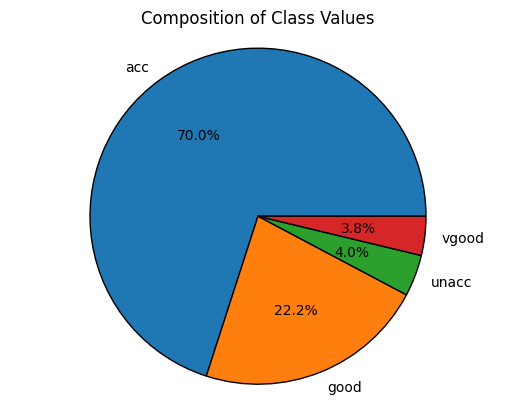

In [44]:
class_value = df['class'].value_counts()
labels = ['acc', 'good','unacc', 'vgood']
sizes = [class_value[0], class_value[1], class_value[2], class_value[3]]
# print(sizes) # adds up to 1433, which is the total number of participants
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, wedgeprops = {"linewidth": 1, "edgecolor": "black"})
ax1.axis('equal')
plt.title("Composition of Class Values")
plt.show()

### Feature Engineering
Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

In [18]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [19]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


### Encode Categorical Variables

In [20]:
encoder = ce.OrdinalEncoder(col_names)

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [21]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [22]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


### Random Forest Classifier model with default parameters
Executes Random forest with ***10*** decision tress by default.
Random Forest Classifier model with default parameter of n_estimators = 10.
We have used 10 decision-trees to build the model. Now, increase the number of decision-trees and see its effect on accuracy.

In [23]:
rfc = RandomForestClassifier(n_estimators=10 ,random_state=0)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

In [24]:
# Check Accuracy Score
print("Model accuracy score with 10 decision-trees : {0:0.4f}".format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9247


### Random Forest Classifier model with parameter n_estimator = 100

In [31]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

rfc_100.fit(X_train, y_train)

y_pred_100 = rfc_100.predict(X_test)

In [26]:
# Check Accuracy Score
print("Model accuracy score with 100 decision-trees : {0:0.4f}".format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9457


Cars Decision Tree Train|Test Accuracy Score for 10 depth: 0.9991356957649092 | 0.9246935201401051
Cars Decision Tree Train|Test Accuracy Score for 20 depth: 0.9991356957649092 | 0.9369527145359019
Cars Decision Tree Train|Test Accuracy Score for 30 depth: 1.0 | 0.9352014010507881
Cars Decision Tree Train|Test Accuracy Score for 40 depth: 1.0 | 0.9404553415061296
Cars Decision Tree Train|Test Accuracy Score for 50 depth: 1.0 | 0.9422066549912435
Cars Decision Tree Train|Test Accuracy Score for 60 depth: 1.0 | 0.9422066549912435
Cars Decision Tree Train|Test Accuracy Score for 70 depth: 1.0 | 0.9387040280210157
Cars Decision Tree Train|Test Accuracy Score for 80 depth: 1.0 | 0.9422066549912435
Cars Decision Tree Train|Test Accuracy Score for 90 depth: 1.0 | 0.9457092819614711
Cars Decision Tree Train|Test Accuracy Score for 100 depth: 1.0 | 0.9457092819614711
Cars Decision Tree Train|Test Accuracy Score for 200 depth: 1.0 | 0.9404553415061296


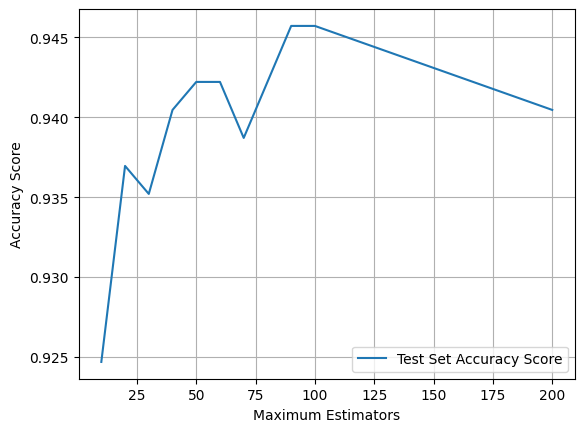

In [47]:
depths = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200]#, 300, 400, 500, 600, 1000]
train_accuracy = []
test_accuracy = []
for depth in depths:
    cars_tree = RandomForestClassifier(n_estimators=depth ,random_state=0)
    cars_tree.fit(X_train, y_train)
    y_pred_train = cars_tree.predict(X_train)
    curr_train_accuracy = metrics.accuracy_score(y_train, y_pred_train)
    y_pred_test = cars_tree.predict(X_test)
    curr_test_accuracy = metrics.accuracy_score(y_test, y_pred_test)
    print(f"Cars Decision Tree Train|Test Accuracy Score for {depth} depth:", curr_train_accuracy, '|', curr_test_accuracy)
    train_accuracy.append(curr_train_accuracy)
    test_accuracy.append(curr_test_accuracy)
# sns.mpl.pyplot.plot(depths, train_accuracy, label='Training Set Accuracy Score')
sns.mpl.pyplot.plot(depths, test_accuracy, label='Test Set Accuracy Score')
sns.mpl.pyplot.xlabel('Maximum Estimators')
sns.mpl.pyplot.ylabel('Accuracy Score')
sns.mpl.pyplot.legend()
sns.mpl.pyplot.grid(True)

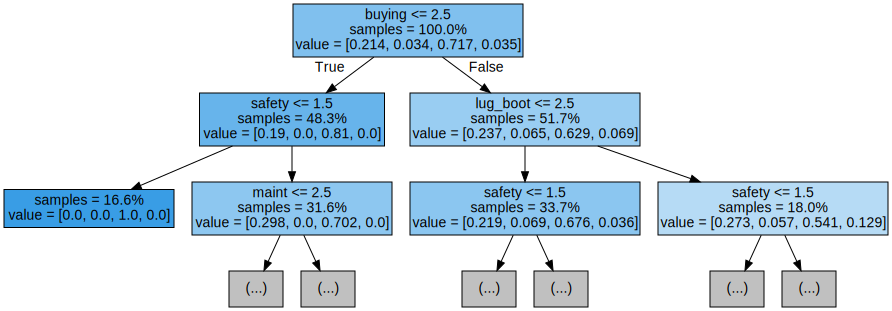

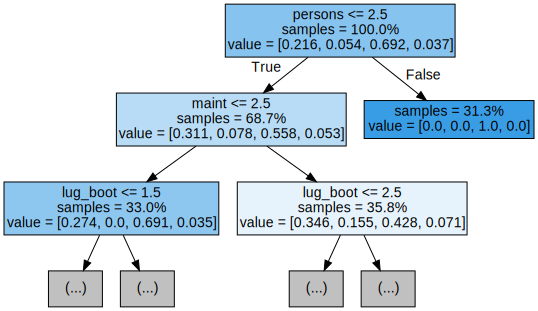

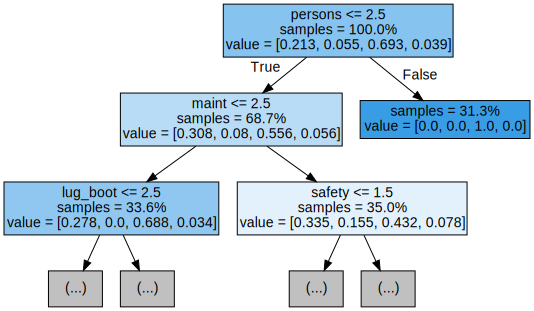

In [50]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rfc_100.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

### Find imporatnt features with Random Forest model

In [ ]:
# Creating a classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety      0.295319
persons     0.233856
buying      0.151734
maint       0.146653
lug_boot    0.100048
doors       0.072389
dtype: float64

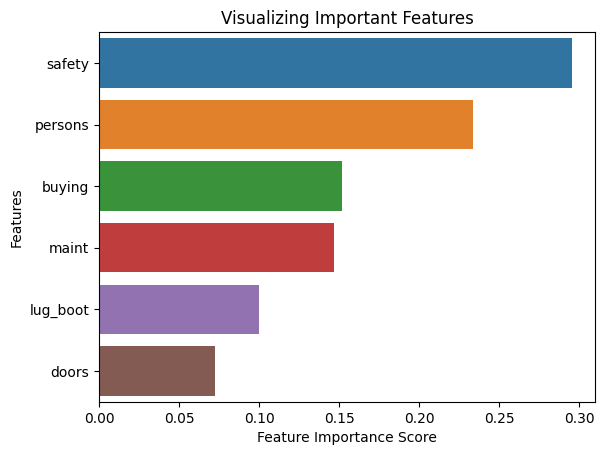

In [ ]:
sns.barplot(x=feature_scores, y=feature_scores.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

plt.title("Visualizing Important Features")

plt.show()

In [ ]:
X = df.drop(['class', 'doors'], axis = 1)

y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

encoder = ce.OrdinalEncoder(['buying', 'maint', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
clf = RandomForestClassifier(n_estimators = 100, random_state = 0)

clf.fit(X_train, y_train)

y_pred_features = clf.predict(X_test)

In [ ]:
# Check Accuracy Score
print("Model accuracy score with 100 decision-trees : {0:0.4f}".format(accuracy_score(y_test, y_pred_features)))

Model accuracy score with 100 decision-trees : 0.9264


### Confusion Matrix

Confusion Matrix

 [[104  12  10   3]
 [  0  18   0   2]
 [ 10   0 387   0]
 [  3   2   0  20]]


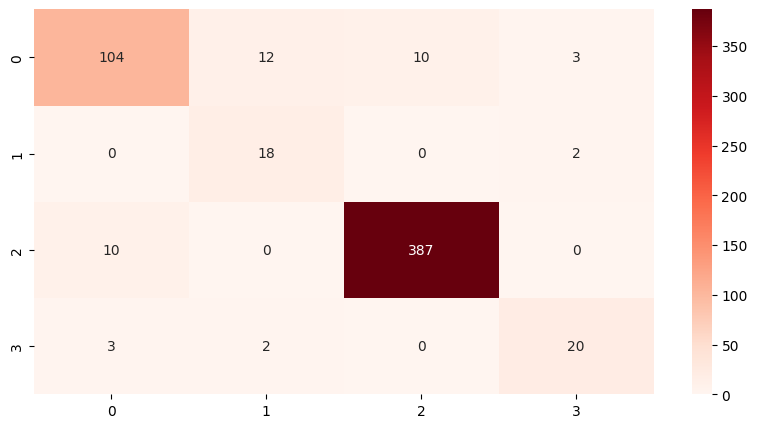

In [ ]:
cm = confusion_matrix(y_test, y_pred_features)
print("Confusion Matrix\n\n", cm)
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.show()

### Classification Report

<Axes: >

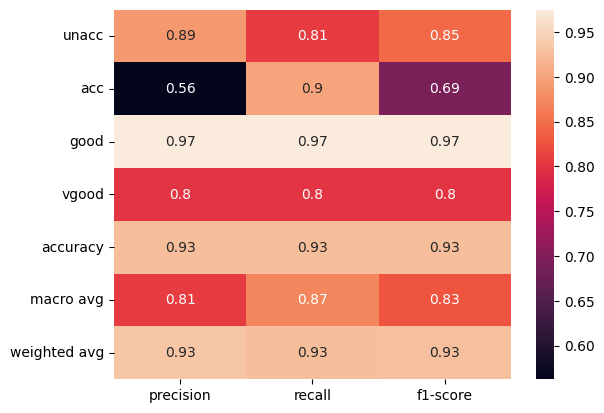

In [ ]:
target_names = ['unacc', 'acc', 'good', 'vgood']
clf_report = classification_report(y_test,
                                   y_pred_features,
                                   target_names=target_names,
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)